<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [59]:
%pwd

'/Users/yingwang/Desktop/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/KristineYW/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [3]:
shops.shape

(7616, 3)

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [4]:
# Import libraries

from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [5]:
# Generate custom stop words

STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'place', 'shop', 'austin', 1, 'order', 'check', 'in', '1', 'listed', 'checkin', ' ', '$', 'coffeeshop'])

In [6]:
# Tokenize text to remove non-alphanumeric characters from the reviews

def tokenize(text):

    tokens = re.sub('[^a-zA-Z ]', '', text)
    tokens = tokens.lower()
    
    return tokens

In [7]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,checkin love love loved the atmosphere ever...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,listed in date night austin ambiance in aust...
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,checkin listed in brunch spots i loved the ...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,very cool decor good drinks nice seating ho...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,checkin they are located within the northcr...


In [8]:
shops['tokens'][0]

'   checkin love love loved the atmosphere every corner of the coffee shop had its own style and there were swings i ordered the matcha latte and it was muy fantastico ordering and getting my drink were pretty streamlined i ordered on an ipad which included all beverage selections that ranged from coffee to wine desired level of sweetness and a checkout system i got my latte within minutes  i was hoping for a typical heart or feather on my latte but found myself listing out all the possibilities of what the art may be any ideas '

In [9]:
# Generate custom stop words

STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'place', 'shop', 'austin', 1, 'order', 'check', 'in', '1', 'listed', 'checkin', ' ', '$', 'coffeeshop'])

In [10]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,checkin love love loved the atmosphere ever...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,listed in date night austin ambiance in aust...
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,checkin listed in brunch spots i loved the ...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,very cool decor good drinks nice seating ho...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,checkin they are located within the northcr...


In [16]:
tokens = []

for doc in nlp.pipe(shops['tokens'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if (token.is_stop == False) & (token.is_punct == False):
            if token.text.lower() not in STOP_WORDS:
                doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens2'] = tokens

In [11]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
                lemmas.append(token.lemma_)
    
    return lemmas

In [12]:
# Apply lemmatization to the tokenized string

shops['lemmas'] = shops['tokens'].apply(get_lemmas)

In [14]:
shops['tokens'][0]

'   checkin love love loved the atmosphere every corner of the coffee shop had its own style and there were swings i ordered the matcha latte and it was muy fantastico ordering and getting my drink were pretty streamlined i ordered on an ipad which included all beverage selections that ranged from coffee to wine desired level of sweetness and a checkout system i got my latte within minutes  i was hoping for a typical heart or feather on my latte but found myself listing out all the possibilities of what the art may be any ideas '

In [17]:
get_lemmas(shops['tokens2'][0])

TypeError: Argument 'string' has incorrect type (expected str, got list)

In [18]:
# Check the output

print(shops.shape)

shops.head()

(7616, 6)


,coffee_shop_name,full_review_text,star_rating,tokens,lemmas,tokens2
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,checkin love love loved the atmosphere ever...,"[ , love, love, love, atmosphere, corner, st...","[ , love, love, loved, atmosphere, corner, s..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,listed in date night austin ambiance in aust...,"[ , date, night, ambiance, beautiful, love, a...","[ , date, night, ambiance, beautiful, love, a..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,checkin listed in brunch spots i loved the ...,"[ , brunch, spot, love, eclectic, homey, plu...","[ , brunch, spots, loved, eclectic, homey, p..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,very cool decor good drinks nice seating ho...,"[ , cool, decor, good, drink, nice, seating, ...","[ , cool, decor, good, drinks, nice, seating,..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,checkin they are located within the northcr...,"[ , locate, northcross, mall, shopping, cent...","[ , located, northcross, mall, shopping, cen..."


In [19]:
# Change the ratings to integers

shops['star_rating'] = pd.to_numeric(shops['star_rating'].astype(str).str[:2], errors='coerce')

In [20]:
# Ensure the datatype for the ratings

shops['star_rating'].dtype

dtype('int64')

In [21]:
# Create counter function

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [25]:
# Apply word count to the lemmas column

wc = count(shops['lemmas'])

In [26]:
wc.head(30)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
45,,5012,5655,1.0,0.016371,0.016371,0.658088
153,good,3587,5383,2.0,0.015583,0.031954,0.470982
75,not,3055,5175,3.0,0.014981,0.046935,0.401129
123,great,2853,3946,4.0,0.011423,0.058358,0.374606
13,,3121,3485,5.0,0.010089,0.068447,0.409795
158,like,2260,3351,6.0,0.009701,0.078148,0.296744
436,come,1935,2636,7.0,0.007631,0.085779,0.254070
12,love,1818,2375,8.0,0.006875,0.092654,0.238708
457,time,1745,2366,9.0,0.006849,0.099504,0.229123
10,drink,1623,2324,10.0,0.006728,0.106232,0.213104


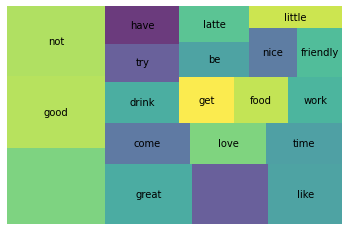

In [59]:
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [60]:
# Use spacy

import spacy 

nlp = spacy.load('en_core_web_lg')

In [61]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,checkin love love loved the atmosphere ever...,"[ , love, love, love, atmosphere, corner, st..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4,listed in date night austin ambiance in aust...,"[ , date, night, ambiance, beautiful, love, a..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4,checkin listed in brunch spots i loved the ...,"[ , brunch, spot, love, eclectic, homey, plu..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2,very cool decor good drinks nice seating ho...,"[ , cool, decor, good, drink, nice, seating, ..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4,checkin they are located within the northcr...,"[ , locate, northcross, mall, shopping, cent..."


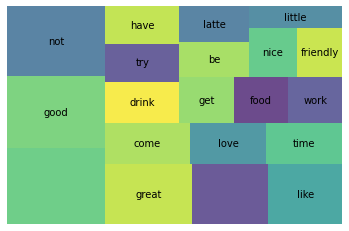

In [62]:
# View overall count

wc2 = count(shops['lemmas'])
wc2_top20 = wc2[wc2['rank'] <= 20]

squarify.plot(sizes=wc2_top20['pct_total'], label=wc2_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

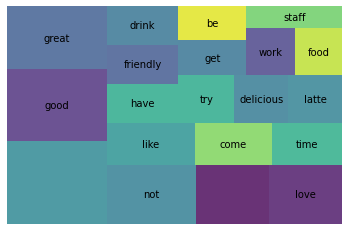

In [63]:
# View count by rating = 5.0

shops_5 = shops.loc[shops['star_rating'] == 5.0] 

wc_5 = count(shops_5['lemmas']) 
wc_5_top20 = wc_5[wc_5['rank'] <= 20]

squarify.plot(sizes=wc_5_top20['pct_total'], label=wc_5_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

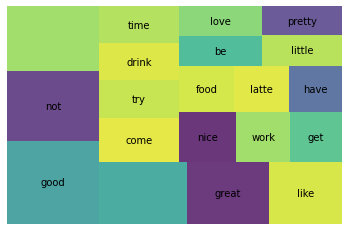

In [64]:
# View count by rating = 4.0

shops_4 = shops.loc[shops['star_rating'] == 4.0] 

wc_4 = count(shops_4['lemmas']) 
wc_4_top20 = wc_4[wc_4['rank'] <= 20]

squarify.plot(sizes=wc_4_top20['pct_total'], label=wc_4_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [65]:
wc_4.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
162,good,1231,1912,1.0,0.016521,0.016521,0.521610
100,not,968,1631,2.0,0.014093,0.030615,0.410169
19,,1325,1507,3.0,0.013022,0.043636,0.561441
96,,1230,1386,4.0,0.011976,0.055613,0.521186
23,great,945,1292,5.0,0.011164,0.066777,0.400424


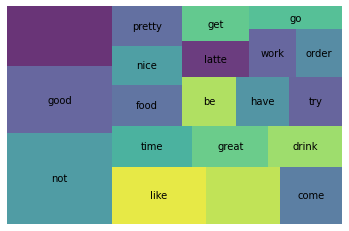

In [66]:
# View count by rating = 3.0

shops_3 = shops.loc[shops['star_rating'] == 3.0] 

wc_3 = count(shops_3['lemmas']) 
wc_3_top20 = wc_3[wc_3['rank'] <= 20]

squarify.plot(sizes=wc_3_top20['pct_total'], label=wc_3_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

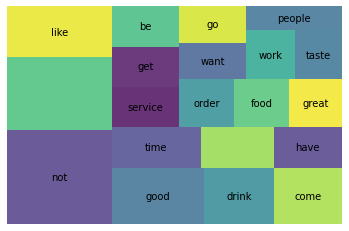

In [67]:
# View count by rating = 2.0

shops_2 = shops.loc[shops['star_rating'] == 2.0] 

wc_2 = count(shops_2['lemmas']) 
wc_2_top20 = wc_2[wc_2['rank'] <= 20]

squarify.plot(sizes=wc_2_top20['pct_total'], label=wc_2_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

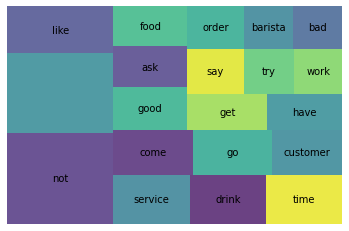

In [68]:
# View count by rating = 1.0

shops_1 = shops.loc[shops['star_rating'] == 1.0] 

wc_1 = count(shops_1['lemmas']) 
wc_1_top20 = wc_1[wc_1['rank'] <= 20]

squarify.plot(sizes=wc_1_top20['pct_total'], label=wc_1_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [69]:
# Pull out only lemmas and rating columns

shops_ratings = shops[['lemmas', 'star_rating']].copy()

In [70]:
# Create a df with a column that separates all lemmas into individual lemmas

shop_ratings2 = shops_ratings['lemmas'].apply(pd.Series) \
    .merge(shops_ratings, right_index = True, left_index = True) \
    .drop(['lemmas'], axis=1) \
    .melt(id_vars = 'star_rating', value_name='lemma')

In [71]:
# Drop all lemma values of NaN

shops_ratings2 = shops_ratings2.dropna(axis=1)

print(shops_ratings2.shape)
shops_ratings2.head()

NameError: name 'shops_ratings2' is not defined

In [96]:
# Group all rows by specific individual lemma 

shops_ratings2 = shops_ratings2.groupby('lemma').mean()

KeyError: 'lemma'

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [72]:
# Concatenate the good-rated dataframes

wc_good = wc_4.append(wc_5)

wc_good.shape

(19226, 7)

In [73]:
# Sanity check to make sure the dataframe will do the correct thing

wc_good.loc[wc_good['word']=='good'] 

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
162,good,1231,1912,1.0,0.016521,0.016521,0.521610
78,good,1708,2471,2.0,0.016106,0.034839,0.451852


In [74]:
# Group by the lemma/word and aggregate the counts

wc_good_group = wc_good.groupby('word').sum()

In [75]:
# Check data to make sure that they are correct

wc_good_group.sort_values(by=['count'])

,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
word,,,,,,
zzzzzz,1,1,6879.0,0.000009,0.982001,0.000424
ownersso,1,1,6246.0,0.000007,0.973811,0.000265
ownersstaff,1,1,5057.0,0.000009,0.966257,0.000424
utdwntwn,1,1,6214.0,0.000009,0.976255,0.000424
owningrunne,1,1,7059.0,0.000009,0.983556,0.000424
...,...,...,...,...,...,...
,2610,2900,9.0,0.021845,0.126522,0.886266
not,2187,3469,6.0,0.026073,0.091656,0.732656
great,2505,3474,8.0,0.025386,0.115838,0.813122


In [76]:
bad_shops = [wc_1,wc_2,wc_3]
wc_bad = pd.concat(bad_shops)

wc_bad.shape

(11493, 7)

In [77]:
wc_bad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
47,not,163,335,1.0,0.023167,0.023167,0.586331
45,,249,297,2.0,0.020539,0.043707,0.895683
103,like,104,173,3.0,0.011964,0.055671,0.374101
19,service,94,129,4.0,0.008921,0.064592,0.338129
43,drink,60,128,5.0,0.008852,0.073444,0.215827


In [78]:
wc_bad_group = wc_bad.groupby('word').sum()

In [79]:
wc_bad_group.sort_values(by=['count'])

,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
word,,,,,,
zucchini,1,1,3475.0,0.000027,0.965284,0.001355
selling,1,1,2321.0,0.000041,0.936217,0.002174
selfrighteous,1,1,2096.0,0.000069,0.948340,0.003597
greyish,1,1,3365.0,0.000041,0.979095,0.002174
selfproclaimed,1,1,4008.0,0.000027,0.979507,0.001355
...,...,...,...,...,...,...
come,452,650,19.0,0.025861,0.256707,0.926270
like,592,937,10.0,0.036710,0.173342,1.190119
good,648,1000,16.0,0.035529,0.218098,1.232233


In [80]:
wc_bad_group = wc_bad_group.rename(columns={'count': 'count_bad'})
wc_good_group = wc_good_group.rename(columns={'count': 'count_good'})


In [81]:
wc_all = pd.merge(wc_bad_group, wc_good_group, on=['word'])
print(wc_all.shape)
wc_all.head()

(4998, 12)


,appears_in_x,count_bad,rank_x,pct_total_x,cul_pct_total_x,appears_in_pct_x,appears_in_y,count_good,rank_y,pct_total_y,cul_pct_total_y,appears_in_pct_y
word,,,,,,,,,,,,
,1077,1274,7.0,0.052911,0.136633,2.310801,3935,4381,4.0,0.031755,0.062369,1.251917
,511,585,50.0,0.020321,0.424222,0.906530,2610,2900,9.0,0.021845,0.126522,0.886266
,5,5,6109.0,0.000219,2.735230,0.011474,16,21,3068.0,0.000158,1.720552,0.005347
,4,4,3081.0,0.000192,1.793113,0.010119,9,11,5051.0,0.000087,1.818241,0.003177
,1,1,3269.0,0.000027,0.959788,0.001355,1,1,5891.0,0.000009,0.973464,0.000424


In [82]:
wc_all.sort_values(by=['count_good'])

,appears_in_x,count_bad,rank_x,pct_total_x,cul_pct_total_x,appears_in_pct_x,appears_in_y,count_good,rank_y,pct_total_y,cul_pct_total_y,appears_in_pct_y
word,,,,,,,,,,,,
unsafe,1,1,2415.0,0.000069,0.970401,0.003597,1,1,6479.0,0.000007,0.975329,0.000265
printer,1,1,2043.0,0.000041,0.924799,0.002174,1,1,5816.0,0.000007,0.971008,0.000265
coffeea,1,1,2868.0,0.000041,0.958682,0.002174,1,1,6654.0,0.000009,0.980057,0.000424
coffeebut,2,2,2032.0,0.000053,0.914719,0.002710,1,1,5146.0,0.000009,0.967026,0.000424
coffeedrinker,1,1,4230.0,0.000027,0.985431,0.001355,1,1,8720.0,0.000007,0.989936,0.000265
...,...,...,...,...,...,...,...,...,...,...,...,...
,511,585,50.0,0.020321,0.424222,0.906530,2610,2900,9.0,0.021845,0.126522,0.886266
not,868,1706,3.0,0.067765,0.067765,1.762718,2187,3469,6.0,0.026073,0.091656,0.732656
great,348,472,55.0,0.017272,0.470563,0.654584,2505,3474,8.0,0.025386,0.115838,0.813122


In [83]:
wc_all = wc_all[['count_bad','count_good']]
wc_all.sort_values(by=['count_good'])

,count_bad,count_good
word,,
unsafe,1,1
printer,1,1
coffeea,1,1
coffeebut,2,1
coffeedrinker,1,1
...,...,...
,585,2900
not,1706,3469
great,472,3474


In [84]:
wc_all['diff'] = abs(wc_all['count_good'] - wc_all['count_bad'])
wc_all.sort_values(by=['diff'], ascending=False)

,count_bad,count_good,diff
word,,,
good,1000,4383,3383
,1274,4381,3107
great,472,3474,3002
,585,2900,2315
love,254,2121,1867
...,...,...,...
reduced,1,1,0
octane,1,1,0
se,2,2,0


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

